In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools
from scipy import stats

In [2]:
seeds=5
rnn = {k: np.zeros((seeds,562)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}
rnn_sign_frozen = {k: np.zeros((seeds,562)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}
# dann_rnn = {k: np.zeros((seeds,1875)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}
dann_rnn = {k: np.zeros((seeds,562)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}
song_rnn_original = {k: np.zeros((seeds,1875)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}
rnn_song_spec = {k: np.zeros((seeds,562)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}
song_rnn_spec = {k: np.zeros((seeds,562)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}
rnn_song_spec_sign_frozen = {k: np.zeros((seeds,562)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}
song_rnn_spec_sign_frozen = {k: np.zeros((seeds,562)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}
song_rnn_original_sign_not_fixed = {k: np.zeros((seeds,562)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}

for i in range(seeds):
    
    d = np.load(f'/network/projects/linclab_users/danns/playground/seq_mnist_test_danns_hidden_NC/batch_size-32/seed-{i}/danns_learning_curves_seed{i}_lr0.01_GCNone.npz')
    dann_rnn["train_err"][i, :] = d["train_err"]
    dann_rnn["test_err"][i, :] = d["test_err"]
    dann_rnn["train_loss"][i, :] = d["train_loss"]
    dann_rnn["test_loss"][i, :] = d["test_loss"]
    dann_rnn["update"][i, :] = d["update"]
    
    r = np.load(f'/network/projects/linclab_users/danns/playground/seq_mnist_test_rnn_hidden_NC/batch_size-32/seed-{i}/rnn_learning_curves_seed{i}_lr0.01_GCNone.npz')
    rnn["train_err"][i, :] = r["train_err"]
    rnn["test_err"][i, :] = r["test_err"]
    rnn["train_loss"][i, :] = r["train_loss"]
    rnn["test_loss"][i, :] = r["test_loss"]
    rnn["update"][i, :] = r["update"]
    
    r = np.load(f'/network/projects/linclab_users/danns/playground/seq_mnist_sign_rnn_icml_rebuttal/batch_size-32/seed-{i}/sign_rnn_learning_curves_seed{i}_lr0.010772_GC10_rad1.5.npz')
    rnn_sign_frozen["train_err"][i, :] = r["train_err"]
    rnn_sign_frozen["test_err"][i, :] = r["test_err"]
    rnn_sign_frozen["train_loss"][i, :] = r["train_loss"]
    rnn_sign_frozen["test_loss"][i, :] = r["test_loss"]
    rnn_sign_frozen["update"][i, :] = r["update"]
    
    s = np.load(f'/network/projects/linclab_users/danns/playground/seq_mnist_test_song_shallow_icml/batch_size-32/seed-{i}/song_icml_learning_curves_seed{i}_hidden100_lr0.015811_GC10_rad1.5.npz')
    song_rnn_original["train_err"][i, :] = s["train_err"]
    song_rnn_original["test_err"][i, :] = s["test_err"]
    song_rnn_original["train_loss"][i, :] = s["train_loss"]
    song_rnn_original["test_loss"][i, :] = s["test_loss"]
    song_rnn_original["update"][i, :] = s["update"]
    
    s = np.load(f'/network/projects/linclab_users/danns/playground/seq_mnist_new_rnn_colei_spectrum_icml_rebuttal/batch_size-32/seed-{i}/new_rnn_colei_spec_learning_curves_seed{i}_lr0.010772_GC10_rad1.5.npz')
    rnn_song_spec["train_err"][i, :] = s["train_err"]
    rnn_song_spec["test_err"][i, :] = s["test_err"]
    rnn_song_spec["train_loss"][i, :] = s["train_loss"]
    rnn_song_spec["test_loss"][i, :] = s["test_loss"]
    rnn_song_spec["update"][i, :] = s["update"]

    s = np.load(f'/network/projects/linclab_users/danns/playground/seq_mnist_new_colei_rnn_spectrum_icml_rebuttal/batch_size-32/seed-{i}/new_colei_rnn_spec_learning_curves_seed{i}_lr0.010772_GC10_rad1.5.npz')
    song_rnn_spec["train_err"][i, :] = s["train_err"]
    song_rnn_spec["test_err"][i, :] = s["test_err"]
    song_rnn_spec["train_loss"][i, :] = s["train_loss"]
    song_rnn_spec["test_loss"][i, :] = s["test_loss"]
    song_rnn_spec["update"][i, :] = s["update"]
    
    s = np.load(f'/network/projects/linclab_users/danns/playground/seq_mnist_sign_rnn_colei_spectrum_icml_rebuttal/batch_size-32/seed-{i}/sign_rnn_colei_spec_learning_curves_seed{i}_lr0.010772_GC10_rad1.5.npz')
    rnn_song_spec_sign_frozen["train_err"][i, :] = s["train_err"]
    rnn_song_spec_sign_frozen["test_err"][i, :] = s["test_err"]
    rnn_song_spec_sign_frozen["train_loss"][i, :] = s["train_loss"]
    rnn_song_spec_sign_frozen["test_loss"][i, :] = s["test_loss"]
    rnn_song_spec_sign_frozen["update"][i, :] = s["update"]
    
    s = np.load(f'/network/projects/linclab_users/danns/playground/seq_mnist_sign_colei_rnn_spectrum_icml_rebuttal/batch_size-32/seed-{i}/sign_colei_rnn_spec_learning_curves_seed{i}_lr0.010772_GC10_rad1.5.npz')
    song_rnn_spec_sign_frozen["train_err"][i, :] = s["train_err"]
    song_rnn_spec_sign_frozen["test_err"][i, :] = s["test_err"]
    song_rnn_spec_sign_frozen["train_loss"][i, :] = s["train_loss"]
    song_rnn_spec_sign_frozen["test_loss"][i, :] = s["test_loss"]
    song_rnn_spec_sign_frozen["update"][i, :] = s["update"]
    
    s = np.load(f'/network/projects/linclab_users/danns/playground/seq_mnist_test_song_sign_icml/batch_size-32/seed-{i}/sign_song_icml_learning_curves_seed{i}_lr0.010772_GC10.npz')
    song_rnn_original_sign_not_fixed["train_err"][i, :] = s["train_err"]
    song_rnn_original_sign_not_fixed["test_err"][i, :] = s["test_err"]
    song_rnn_original_sign_not_fixed["train_loss"][i, :] = s["train_loss"]
    song_rnn_original_sign_not_fixed["test_loss"][i, :] = s["test_loss"]
    song_rnn_original_sign_not_fixed["update"][i, :] = s["update"]
    


In [3]:
print(rnn_song_spec_sign_frozen["test_err"].mean(axis=0)[467])
print(rnn_song_spec["test_err"].mean(axis=0)[467])
print(song_rnn_original_sign_not_fixed["test_err"].mean(axis=0)[467])
print(song_rnn_original["test_err"].mean(axis=0)[467])
print(song_rnn_spec_sign_frozen["test_err"].mean(axis=0)[467])
print(song_rnn_spec["test_err"].mean(axis=0)[467])
print(rnn_sign_frozen["test_err"].mean(axis=0)[467])
print(rnn["test_err"].mean(axis=0)[467])

3.4959999999999987
3.0420000000000007
3.6199999999999988
3.9460000000000006
2.722
2.318
2.4659999999999993
1.6459999999999986


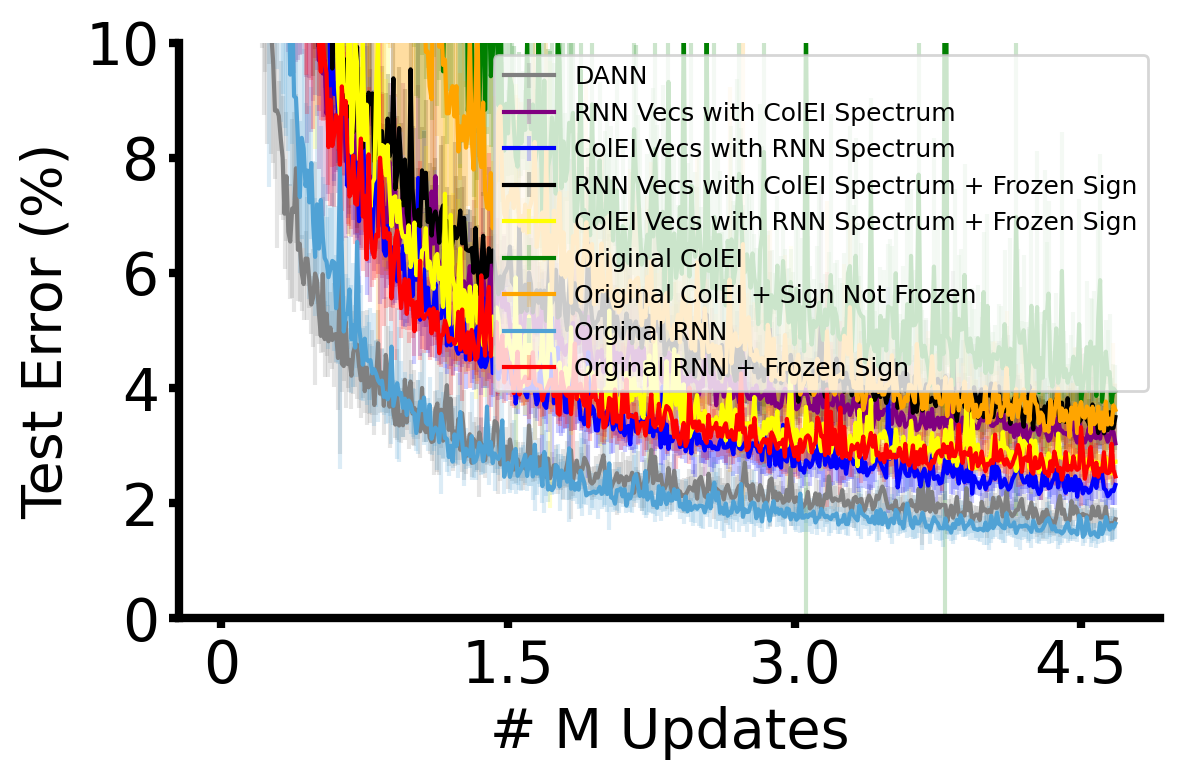

In [6]:
ax = plt.subplot(111)
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams["figure.figsize"] = (6,4)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)

# fig, axes = plt.subplots(dpi=100)
# plt.figure(figsize=(8,5))
plt.xlabel('# M Updates', fontsize=20)
plt.ylabel('Test Error (%)', fontsize=20)
transparency = 0.2
_, _, bars = plt.errorbar(x=dann_rnn["update"].mean(axis=0)[:468], y=dann_rnn["test_err"].mean(axis=0)[:468], yerr=dann_rnn["test_err"].std(axis=0)[:468], color='grey')
[bar.set_alpha(transparency) for bar in bars]
_, _, bars = plt.errorbar(x=rnn_song_spec["update"].mean(axis=0)[:468], y=rnn_song_spec["test_err"].mean(axis=0)[:468], yerr=rnn_song_spec["test_err"].std(axis=0)[:468], color='purple')
[bar.set_alpha(transparency) for bar in bars]
_, _, bars = plt.errorbar(x=song_rnn_spec["update"].mean(axis=0)[:468], y=song_rnn_spec["test_err"].mean(axis=0)[:468], yerr=song_rnn_spec["test_err"].std(axis=0)[:468], color='b')
[bar.set_alpha(transparency) for bar in bars]
_, _, bars = plt.errorbar(x=rnn_song_spec_sign_frozen["update"].mean(axis=0)[:468], y=rnn_song_spec_sign_frozen["test_err"].mean(axis=0)[:468], yerr=rnn_song_spec_sign_frozen["test_err"].std(axis=0)[:468], color='k')
[bar.set_alpha(transparency) for bar in bars]
_, _, bars = plt.errorbar(x=song_rnn_spec_sign_frozen["update"].mean(axis=0)[:468], y=song_rnn_spec_sign_frozen["test_err"].mean(axis=0)[:468], yerr=song_rnn_spec_sign_frozen["test_err"].std(axis=0)[:468], color='yellow')
[bar.set_alpha(transparency) for bar in bars]
_, _, bars = plt.errorbar(x=song_rnn_original["update"].mean(axis=0)[:468], y=song_rnn_original["test_err"].mean(axis=0)[:468], yerr=song_rnn_original["test_err"].std(axis=0)[:468], color='g')
[bar.set_alpha(transparency) for bar in bars]
_, _, bars = plt.errorbar(x=song_rnn_original_sign_not_fixed["update"].mean(axis=0)[:468], y=song_rnn_original_sign_not_fixed["test_err"].mean(axis=0)[:468], yerr=song_rnn_original_sign_not_fixed["test_err"].std(axis=0)[:468], color='orange')
[bar.set_alpha(transparency) for bar in bars]
_, _, bars = plt.errorbar(x=rnn["update"].mean(axis=0)[:468], y=rnn["test_err"].mean(axis=0)[:468], yerr=rnn["test_err"].std(axis=0)[:468], color='#50a2d5')
[bar.set_alpha(transparency) for bar in bars]
_, _, bars = plt.errorbar(x=rnn_sign_frozen["update"].mean(axis=0)[:468], y=rnn_sign_frozen["test_err"].mean(axis=0)[:468], yerr=rnn_sign_frozen["test_err"].std(axis=0)[:468], color='r')
[bar.set_alpha(transparency) for bar in bars]
# _, _, bars = plt.errorbar(x=song_rnn_no_ablate["update"].mean(axis=0), y=song_rnn_no_ablate["test_err"].mean(axis=0), yerr=song_rnn_no_ablate["test_err"].std(axis=0), color='b')
# [bar.set_alpha(transparency) for bar in bars]

plt.ylim([0, 10])
plt.legend(["DANN", "RNN Vecs with ColEI Spectrum", "ColEI Vecs with RNN Spectrum", "RNN Vecs with ColEI Spectrum + Frozen Sign", "ColEI Vecs with RNN Spectrum + Frozen Sign","Original ColEI", "Original ColEI + Sign Not Frozen", "Orginal RNN", "Orginal RNN + Frozen Sign"], fontsize=9, frameon=True)
#plt.legend(["RNN Vecs with ColEI Spectrum", "ColEI Vecs with RNN Spectrum", "Original ColEI", "Orginal RNN"], fontsize=9, frameon=True)
# plt.legend(["RNN (no gc)",  "DANN RNN (no gc)", "Song RNN (gc=10)"], fontsize=18, frameon=False)
plt.yticks(ticks=[0, 2, 4, 6, 8, 10], size=21)
plt.xticks(labels=["0", "1.5", "3.0", "4.5"], ticks=[0, 15000, 30000, 45000], size=21)
plt.tight_layout()

plt.show()

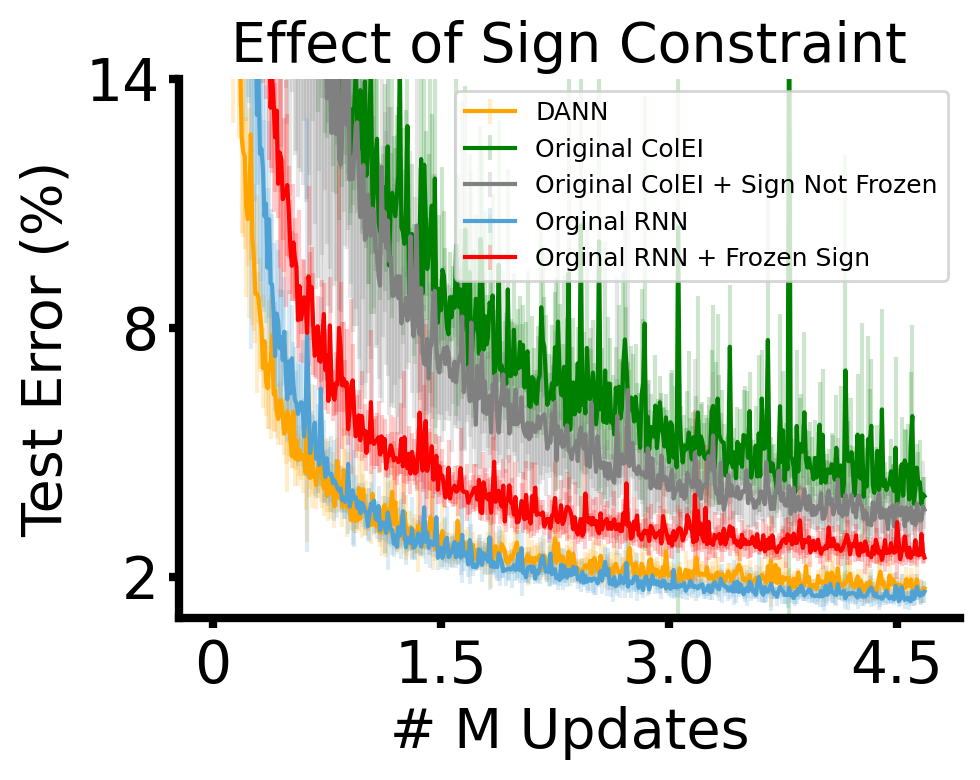

In [16]:
ax = plt.subplot(111)
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams["figure.figsize"] = (5,4)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)

# fig, axes = plt.subplots(dpi=100)
# plt.figure(figsize=(8,5))
plt.xlabel('# M Updates', fontsize=20)
plt.ylabel('Test Error (%)', fontsize=20)
transparency = 0.2
_, _, bars = plt.errorbar(x=dann_rnn["update"].mean(axis=0)[:468], y=dann_rnn["test_err"].mean(axis=0)[:468], yerr=dann_rnn["test_err"].std(axis=0)[:468], color='orange')
[bar.set_alpha(transparency) for bar in bars]
_, _, bars = plt.errorbar(x=song_rnn_original["update"].mean(axis=0)[:468], y=song_rnn_original["test_err"].mean(axis=0)[:468], yerr=song_rnn_original["test_err"].std(axis=0)[:468], color='g')
[bar.set_alpha(transparency) for bar in bars]
_, _, bars = plt.errorbar(x=song_rnn_original_sign_not_fixed["update"].mean(axis=0)[:468], y=song_rnn_original_sign_not_fixed["test_err"].mean(axis=0)[:468], yerr=song_rnn_original_sign_not_fixed["test_err"].std(axis=0)[:468], color='grey')
[bar.set_alpha(transparency) for bar in bars]
_, _, bars = plt.errorbar(x=rnn["update"].mean(axis=0)[:468], y=rnn["test_err"].mean(axis=0)[:468], yerr=rnn["test_err"].std(axis=0)[:468], color='#50a2d5')
[bar.set_alpha(transparency) for bar in bars]
_, _, bars = plt.errorbar(x=rnn_sign_frozen["update"].mean(axis=0)[:468], y=rnn_sign_frozen["test_err"].mean(axis=0)[:468], yerr=rnn_sign_frozen["test_err"].std(axis=0)[:468], color='r')
[bar.set_alpha(transparency) for bar in bars]
# _, _, bars = plt.errorbar(x=song_rnn_no_ablate["update"].mean(axis=0), y=song_rnn_no_ablate["test_err"].mean(axis=0), yerr=song_rnn_no_ablate["test_err"].std(axis=0), color='b')
# [bar.set_alpha(transparency) for bar in bars]

plt.ylim([1, 10])
plt.title('Effect of Sign Constraint', fontsize=20)
plt.legend(["DANN","Original ColEI", "Original ColEI + Sign Not Frozen", "Orginal RNN", "Orginal RNN + Frozen Sign"], fontsize=9, frameon=True)
#plt.legend(["RNN Vecs with ColEI Spectrum", "ColEI Vecs with RNN Spectrum", "Original ColEI", "Orginal RNN"], fontsize=9, frameon=True)
# plt.legend(["RNN (no gc)",  "DANN RNN (no gc)", "Song RNN (gc=10)"], fontsize=18, frameon=False)
plt.yticks(ticks=[2,8,14], size=21)
plt.xticks(labels=["0", "1.5", "3.0", "4.5"], ticks=[0, 15000, 30000, 45000], size=21)
plt.tight_layout()
# plt.savefig('new_plots/SeqMNIST_RNN_Song_Test_Acc.png', format='png', dpi=200)
# plt.savefig('new_plots/SeqMNIST_RNN_Song_Test_Acc.svg', format='svg', dpi=200)

plt.savefig('SeqMNIST_Begal_sign.png', format='png', dpi=200)
plt.savefig('SeqMNIST_Begal_sign.svg', format='svg', dpi=200)

plt.show()

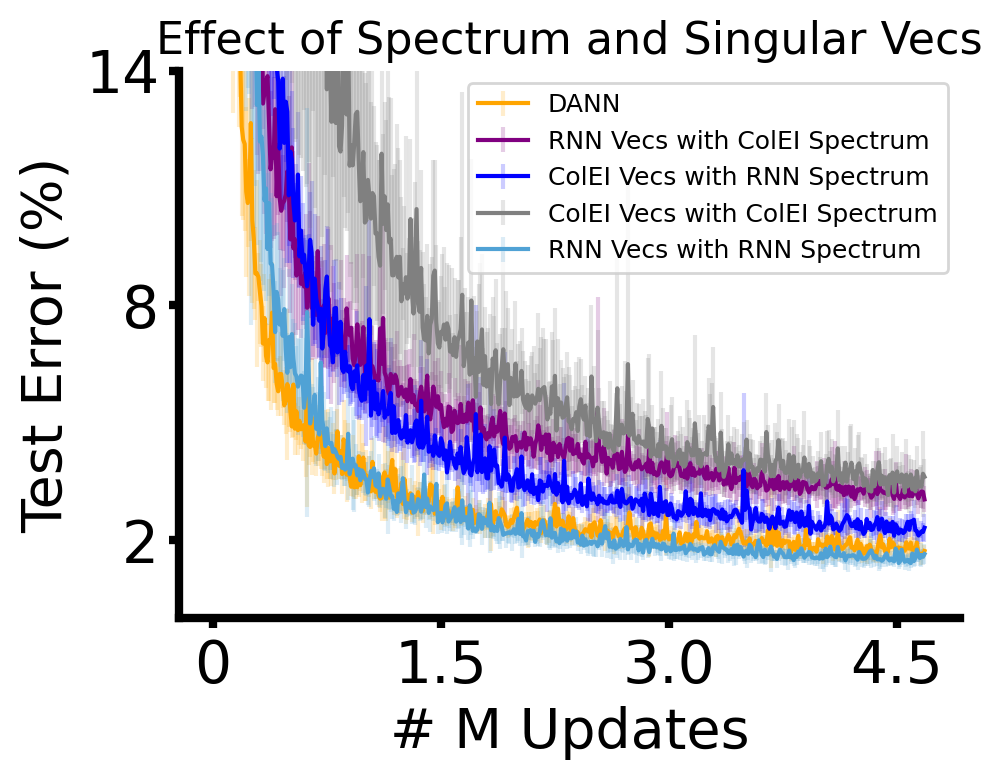

In [18]:
ax = plt.subplot(111)
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams["figure.figsize"] = (5,4)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)

# fig, axes = plt.subplots(dpi=100)
# plt.figure(figsize=(8,5))
plt.xlabel('# M Updates', fontsize=20)
plt.ylabel('Test Error (%)', fontsize=20)
transparency = 0.2
_, _, bars = plt.errorbar(x=dann_rnn["update"].mean(axis=0)[:468], y=dann_rnn["test_err"].mean(axis=0)[:468], yerr=dann_rnn["test_err"].std(axis=0)[:468], color='orange')
[bar.set_alpha(transparency) for bar in bars]
_, _, bars = plt.errorbar(x=rnn_song_spec["update"].mean(axis=0)[:468], y=rnn_song_spec["test_err"].mean(axis=0)[:468], yerr=rnn_song_spec["test_err"].std(axis=0)[:468], color='purple')
[bar.set_alpha(transparency) for bar in bars]
_, _, bars = plt.errorbar(x=song_rnn_spec["update"].mean(axis=0)[:468], y=song_rnn_spec["test_err"].mean(axis=0)[:468], yerr=song_rnn_spec["test_err"].std(axis=0)[:468], color='b')
[bar.set_alpha(transparency) for bar in bars]
# _, _, bars = plt.errorbar(x=rnn_song_spec_sign_frozen["update"].mean(axis=0)[:468], y=rnn_song_spec_sign_frozen["test_err"].mean(axis=0)[:468], yerr=rnn_song_spec_sign_frozen["test_err"].std(axis=0)[:468], color='k')
# [bar.set_alpha(transparency) for bar in bars]
# _, _, bars = plt.errorbar(x=song_rnn_spec_sign_frozen["update"].mean(axis=0)[:468], y=song_rnn_spec_sign_frozen["test_err"].mean(axis=0)[:468], yerr=song_rnn_spec_sign_frozen["test_err"].std(axis=0)[:468], color='yellow')
# [bar.set_alpha(transparency) for bar in bars]
# _, _, bars = plt.errorbar(x=song_rnn_original["update"].mean(axis=0)[:468], y=song_rnn_original["test_err"].mean(axis=0)[:468], yerr=song_rnn_original["test_err"].std(axis=0)[:468], color='g')
# [bar.set_alpha(transparency) for bar in bars]
_, _, bars = plt.errorbar(x=song_rnn_original_sign_not_fixed["update"].mean(axis=0)[:468], y=song_rnn_original_sign_not_fixed["test_err"].mean(axis=0)[:468], yerr=song_rnn_original_sign_not_fixed["test_err"].std(axis=0)[:468], color='grey')
[bar.set_alpha(transparency) for bar in bars]
_, _, bars = plt.errorbar(x=rnn["update"].mean(axis=0)[:468], y=rnn["test_err"].mean(axis=0)[:468], yerr=rnn["test_err"].std(axis=0)[:468], color='#50a2d5')
[bar.set_alpha(transparency) for bar in bars]
# _, _, bars = plt.errorbar(x=song_rnn_no_ablate["update"].mean(axis=0), y=song_rnn_no_ablate["test_err"].mean(axis=0), yerr=song_rnn_no_ablate["test_err"].std(axis=0), color='b')
# [bar.set_alpha(transparency) for bar in bars]

plt.ylim([0, 10])
plt.title("Effect of Spectrum and Singular Vecs", fontsize=16)
# plt.legend(["DANN", "RNN Vecs with ColEI Spectrum", "ColEI Vecs with RNN Spectrum", "RNN Vecs with ColEI Spectrum + Frozen Sign", "ColEI Vecs with RNN Spectrum + Frozen Sign","Original ColEI", "Original ColEI + Sign Not Frozen", "Orginal RNN"], fontsize=9, frameon=True)

# plt.legend(["DANN", "RNN Vecs with ColEI Spectrum", "ColEI Vecs with RNN Spectrum","Original ColEI", "Original ColEI + Sign Not Frozen", "Orginal RNN"], fontsize=9, frameon=True)
plt.legend(["DANN", "RNN Vecs with ColEI Spectrum", "ColEI Vecs with RNN Spectrum", "ColEI Vecs with ColEI Spectrum", "RNN Vecs with RNN Spectrum"], fontsize=9, frameon=True)
#plt.legend(["RNN Vecs with ColEI Spectrum", "ColEI Vecs with RNN Spectrum", "Original ColEI", "Orginal RNN"], fontsize=9, frameon=True)
# plt.legend(["RNN (no gc)",  "DANN RNN (no gc)", "Song RNN (gc=10)"], fontsize=18, frameon=False)
plt.yticks(ticks=[2, 8, 14], size=21)
plt.xticks(labels=["0", "1.5", "3.0", "4.5"], ticks=[0, 15000, 30000, 45000], size=21)
plt.tight_layout()

plt.savefig('SeqMNIST_Begal_spectrum.png', format='png', dpi=200)
plt.savefig('SeqMNIST_Begal_spectrum.svg', format='svg', dpi=200)

plt.show()

In [19]:
def label_diff(i,j,text,X,Y):
    x = (X[i]+X[j])/2
    y = 1.1*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])

    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':20,'shrinkB':20,'linewidth':2}
    ax.annotate(text, xy=(X[i],y+7), zorder=10)
    ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)

In [20]:
def barplot_annotate_brackets(num1, num2, data, center, height, yerr=None, dh=.05, barh=.05, fs=None, maxasterix=None):
    """ 
    Annotate barplot with p-values.

    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """

    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # etc.
        text = ''
        p = .05

        while data < p:
            text += '*'
            p /= 10.

            if maxasterix and len(text) == maxasterix:
                break

        if len(text) == 0:
            text = 'n. s.'

    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]

    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]

    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)

    plt.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs

    plt.text(*mid, text, **kwargs)

0.004290744839612918 0.41329527023083557 0.021621071533499247
0.0119252335930176 0.2948019919337048 0.031746031746031744


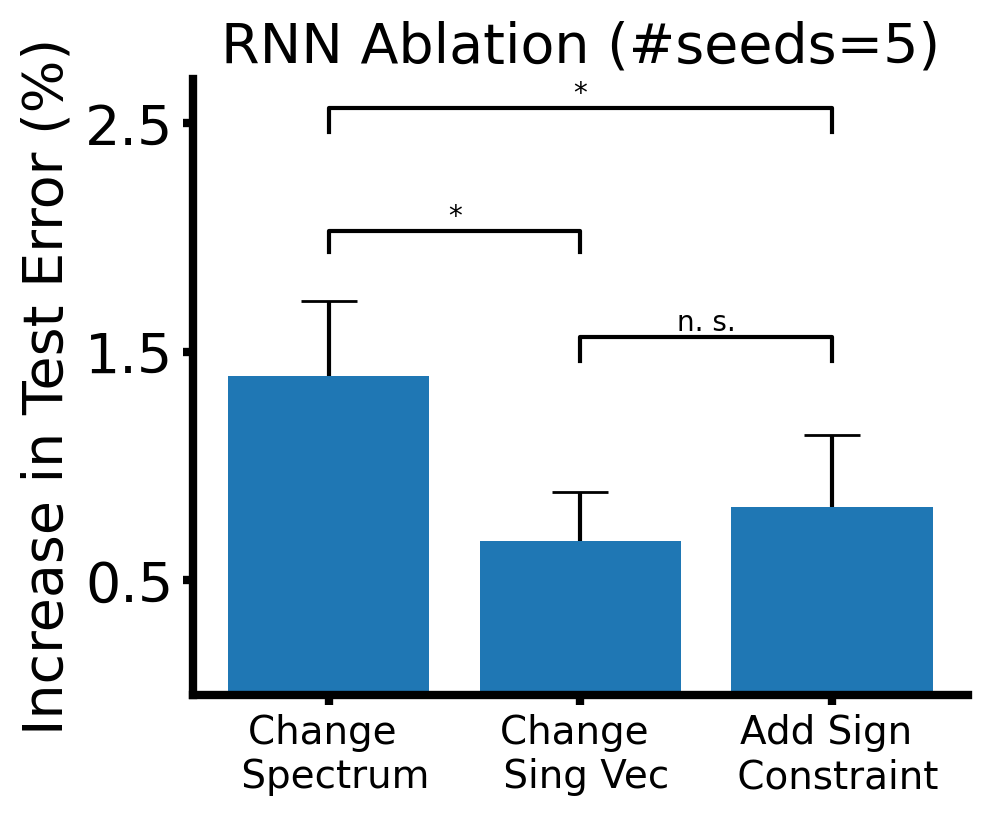

In [38]:
fig, ax = plt.subplots()
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams["figure.figsize"] = (5,4)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)


plt.title('RNN Ablation (#seeds=5)', fontsize=20)
plt.ylabel('Increase in Test Error (%)', fontsize=20)
transparency = 0.2

menMeans   = (5, 15, 30, 40)
menStd     = (2, 3, 4, 5)
ind  = np.arange(3)    # the x locations for the groups
width= 0.7
labels = ('Change \n Spectrum', 'Change \n Sing Vec', 'Add Sign \n Constraint')

# Pull the formatting out here
bar_kwargs = {'width':width,'color':'y','linewidth':2,'zorder':5}
err_kwargs = {'zorder':0,'fmt':'none','linewidth':2,'ecolor':'k'}  #for matplotlib >= v1.4 use 'fmt':'none' instead

# ax.p1 = plt.bar(ind, menMeans, **bar_kwargs)
# ax.errs = plt.errorbar(ind, menMeans, yerr=menStd, **err_kwargs)

heights = []
stds = []

heights.append(-rnn["test_err"].mean(axis=0)[467]+rnn_song_spec["test_err"].mean(axis=0)[467])
heights.append(-rnn["test_err"].mean(axis=0)[467]+song_rnn_spec["test_err"].mean(axis=0)[467])
heights.append(-rnn["test_err"].mean(axis=0)[467]+rnn_sign_frozen["test_err"].mean(axis=0)[467])

# stds.append(np.sqrt(rnn["test_err"].std(axis=0)[467]**2 + rnn_song_spec["test_err"].std(axis=0)[467]**2))
# stds.append(np.sqrt(rnn["test_err"].std(axis=0)[467]**2 + song_rnn_spec["test_err"].std(axis=0)[467]**2))
# stds.append(np.sqrt(rnn["test_err"].std(axis=0)[467]**2 + rnn_sign_frozen["test_err"].std(axis=0)[467]**2))

stds.append(np.std(rnn["test_err"][:,467]- rnn_song_spec["test_err"][:,467], ddof=1))
stds.append(np.std(rnn["test_err"][:,467]- song_rnn_spec["test_err"][:,467], ddof=1))
stds.append(np.std(rnn["test_err"][:,467]- rnn_sign_frozen["test_err"][:,467], ddof=1))



bars = np.arange(len(heights))

plt.bar(bars, heights, align='center')
plotline, caplines, barlinecols = ax.errorbar(bars, heights, yerr=stds, lolims=True, capsize = 0, ls='None', color='k')
caplines[0].set_marker('_')
caplines[0].set_markersize(20)
#plt.errorbar(ind, heights, yerr=stds)

rvs1 = -rnn["test_err"][:,467]+rnn_song_spec["test_err"][:,467]
rvs2 = -rnn["test_err"][:,467]+song_rnn_spec["test_err"][:,467]
rvs3 = -rnn["test_err"][:,467]+rnn_sign_frozen["test_err"][:,467]
_, p1 = stats.ttest_ind(rvs1, rvs2, equal_var=False)
_, p2 = stats.ttest_ind(rvs2, rvs3, equal_var=False)
_, p3 = stats.ttest_ind(rvs1, rvs3, equal_var=False)
print(p1,p2,p3)

_, p1 = stats.mannwhitneyu(rvs1, rvs2)
_, p2 = stats.mannwhitneyu(rvs2, rvs3)
_, p3 = stats.mannwhitneyu(rvs1, rvs3)
print(p1,p2,p3)

barplot_annotate_brackets(0, 1, p1, bars, heights, dh=0.3)
barplot_annotate_brackets(1, 2, p2, bars, heights, dh=0.3)
barplot_annotate_brackets(0, 2, p3, bars, heights, dh=.5)

plt.xticks(ind, labels, color='k', size=14)
plt.yticks([0.5, 1.5, 2.5], size=20)

plt.savefig('SeqMNIST_RNN_Ablation_bar.svg', format='svg', dpi=200)
plt.savefig('SeqMNIST_RNN_Ablation_bar.png', format='png', dpi=200)

plt.show()

In [39]:
seeds=30

song_rnn_original_more = {k: np.zeros((seeds,562)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}

rnn_song_spec_sign_frozen_more = {k: np.zeros((seeds,562)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}
song_rnn_spec_sign_frozen_more = {k: np.zeros((seeds,562)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}
song_rnn_original_sign_not_fixed_more = {k: np.zeros((seeds,562)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}

for i in range(seeds):

    s = np.load(f'/network/projects/linclab_users/danns/playground/seq_mnist_colei_more/batch_size-32/seed-{i}/colei_learning_curves_seed{i}_hidden100_lr0.01_GC10_rad1.5.npz')
    song_rnn_original_more["train_err"][i, :] = s["train_err"]
    song_rnn_original_more["test_err"][i, :] = s["test_err"]
    song_rnn_original_more["train_loss"][i, :] = s["train_loss"]
    song_rnn_original_more["test_loss"][i, :] = s["test_loss"]
    song_rnn_original_more["update"][i, :] = s["update"]
    
    s = np.load(f'/network/projects/linclab_users/danns/playground/seq_mnist_sign_rnn_colei_spectrum_more/batch_size-32/seed-{i}/sign_rnn_colei_spec_learning_curves_seed{i}_lr0.01_GC10_rad1.5.npz')
    rnn_song_spec_sign_frozen_more["train_err"][i, :] = s["train_err"]
    rnn_song_spec_sign_frozen_more["test_err"][i, :] = s["test_err"]
    rnn_song_spec_sign_frozen_more["train_loss"][i, :] = s["train_loss"]
    rnn_song_spec_sign_frozen_more["test_loss"][i, :] = s["test_loss"]
    rnn_song_spec_sign_frozen_more["update"][i, :] = s["update"]
    
    s = np.load(f'/network/projects/linclab_users/danns/playground/seq_mnist_sign_colei_rnn_spectrum_more/batch_size-32/seed-{i}/sign_colei_rnn_spec_learning_curves_seed{i}_lr0.01_GC10_rad1.5.npz')
    song_rnn_spec_sign_frozen_more["train_err"][i, :] = s["train_err"]
    song_rnn_spec_sign_frozen_more["test_err"][i, :] = s["test_err"]
    song_rnn_spec_sign_frozen_more["train_loss"][i, :] = s["train_loss"]
    song_rnn_spec_sign_frozen_more["test_loss"][i, :] = s["test_loss"]
    song_rnn_spec_sign_frozen_more["update"][i, :] = s["update"]
    
    s = np.load(f'/network/projects/linclab_users/danns/playground/seq_mnist_test_song_sign_more/batch_size-32/seed-{i}/sign_song_icml_learning_curves_seed{i}_lr0.01_GC10.npz')
    song_rnn_original_sign_not_fixed_more["train_err"][i, :] = s["train_err"]
    song_rnn_original_sign_not_fixed_more["test_err"][i, :] = s["test_err"]
    song_rnn_original_sign_not_fixed_more["train_loss"][i, :] = s["train_loss"]
    song_rnn_original_sign_not_fixed_more["test_loss"][i, :] = s["test_loss"]
    song_rnn_original_sign_not_fixed_more["update"][i, :] = s["update"]
    


0.024587041005000622 0.5665093313621066 0.0035207929732035737
0.0032595091567044756 0.4077048621476319 0.0001493155009485189


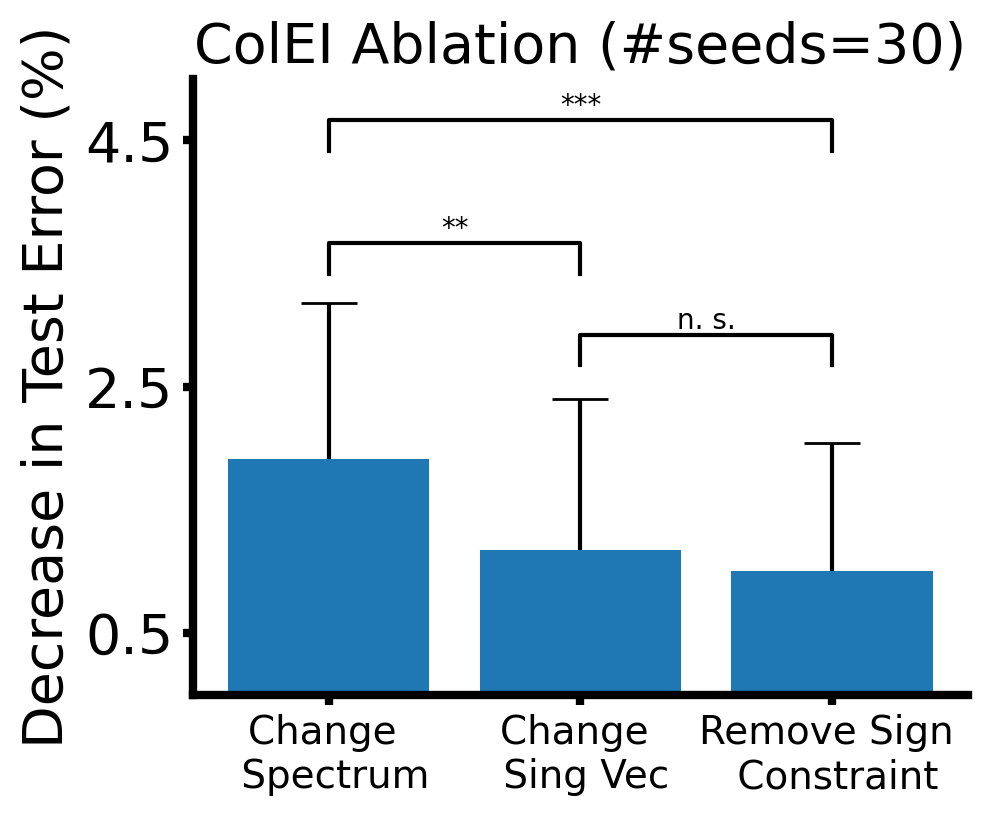

In [43]:
fig, ax = plt.subplots()
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams["figure.figsize"] = (5,4)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)

# fig, axes = plt.subplots(dpi=100)
# plt.figure(figsize=(8,5))
# plt.xlabel('# M Updates', fontsize=20)
plt.title('ColEI Ablation (#seeds=30)', fontsize=20)
plt.ylabel('Decrease in Test Error (%)', fontsize=20)

labels = ('Change \n Spectrum', 'Change \n Sing Vec', 'Remove Sign \n Constraint')

# Pull the formatting out here
bar_kwargs = {'width':width,'color':'y','linewidth':2,'zorder':5}
err_kwargs = {'zorder':0,'fmt':'none','linewidth':2,'ecolor':'k'}  #for matplotlib >= v1.4 use 'fmt':'none' instead

# ax.p1 = plt.bar(ind, menMeans, **bar_kwargs)
# ax.errs = plt.errorbar(ind, menMeans, yerr=menStd, **err_kwargs)

heights = []
stds = []

heights.append(song_rnn_original_more["test_err"].mean(axis=0)[467]-song_rnn_spec_sign_frozen_more["test_err"].mean(axis=0)[467])
heights.append(song_rnn_original_more["test_err"].mean(axis=0)[467]-rnn_song_spec_sign_frozen_more["test_err"].mean(axis=0)[467])
heights.append(song_rnn_original_more["test_err"].mean(axis=0)[467]-song_rnn_original_sign_not_fixed_more["test_err"].mean(axis=0)[467])

# stds.append(np.sqrt(song_rnn_original_more["test_err"].std(axis=0)[467]**2 + song_rnn_spec_sign_frozen_more["test_err"].std(axis=0)[467]**2))
# stds.append(np.sqrt(song_rnn_original_more["test_err"].std(axis=0)[467]**2 + rnn_song_spec_sign_frozen_more["test_err"].std(axis=0)[467]**2))
# stds.append(np.sqrt(song_rnn_original_more["test_err"].std(axis=0)[467]**2 + song_rnn_original_sign_not_fixed_more["test_err"].std(axis=0)[467]**2))

stds.append(np.std(song_rnn_original_more["test_err"][:,467] - song_rnn_spec_sign_frozen_more["test_err"][:,467], ddof=1))
stds.append(np.std(song_rnn_original_more["test_err"][:,467] - rnn_song_spec_sign_frozen_more["test_err"][:,467], ddof=1))
stds.append(np.std(song_rnn_original_more["test_err"][:,467] - song_rnn_original_sign_not_fixed_more["test_err"][:,467], ddof=1))


bars = np.arange(len(heights))

plt.bar(bars, heights, align='center')
plotline, caplines, barlinecols = ax.errorbar(bars, heights, yerr=stds, lolims=True, capsize = 0, ls='None', color='k')
caplines[0].set_marker('_')
caplines[0].set_markersize(20)
# plt.errorbar(lolims=True)
#plt.errorbar(ind, heights, yerr=stds)

rvs1 = song_rnn_original_more["test_err"][:,467]-song_rnn_spec_sign_frozen_more["test_err"][:,467]
rvs2 = song_rnn_original_more["test_err"][:,467]-rnn_song_spec_sign_frozen_more["test_err"][:,467]
rvs3 = song_rnn_original_more["test_err"][:,467]-song_rnn_original_sign_not_fixed_more["test_err"][:,467]
_, p1 = stats.ttest_ind(rvs1, rvs2, equal_var=False)
_, p2 = stats.ttest_ind(rvs2, rvs3, equal_var=False)
_, p3 = stats.ttest_ind(rvs1, rvs3, equal_var=False)
print(p1,p2,p3)

_, p1 = stats.mannwhitneyu(rvs1, rvs2)
_, p2 = stats.mannwhitneyu(rvs2, rvs3)
_, p3 = stats.mannwhitneyu(rvs1, rvs3)
print(p1,p2,p3)

# barplot_annotate_brackets(0, 1, .1, bars, heights)
# barplot_annotate_brackets(1, 2, .001, bars, heights)
# barplot_annotate_brackets(0, 2, 'p < 0.0075', bars, heights, dh=.2)

plt.ylim([0,5])

barplot_annotate_brackets(0, 1, p1, bars, heights, dh=.3)
barplot_annotate_brackets(1, 2, p2, bars, heights, dh=.3)
barplot_annotate_brackets(0, 2, p3, bars, heights, dh=.5)

plt.xticks(ind, labels, color='k', size=14)
plt.yticks([0.5, 2.5, 4.5], size=20)
# 
plt.savefig('SeqMNIST_ColEI_Ablation_bar.svg', format='svg', dpi=200)
plt.savefig('SeqMNIST_ColEI_Ablation_bar.png', format='png', dpi=200)

plt.show()

In [2]:
seeds=5
rnn = {k: np.zeros((seeds,562)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}
dann_rnn = {k: np.zeros((seeds,562)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}
song_rnn_normal = {k: np.zeros((seeds,1875)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}
song_rnn = {k: np.zeros((seeds,562)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}
song_rnn_no_ablate = {k: np.zeros((seeds,468)) for k in ["test_loss", "test_err", "train_loss", "train_err", "update"]}
for i in range(seeds):
    
    s = np.load(f'/network/projects/linclab_users/danns/playground/seq_mnist_song_icml_rebuttal/batch_size-32/seed-{i}/ablated_song_learning_curves_seed{i}_num_rec_cells1_hidden100_lr0.010772_GC10_rad1.5.npz')
    song_rnn["train_err"][i, :] = s["train_err"]
    song_rnn["test_err"][i, :] = s["test_err"]
    song_rnn["train_loss"][i, :] = s["train_loss"]
    song_rnn["test_loss"][i, :] = s["test_loss"]
    song_rnn["update"][i, :] = s["update"]

    s = np.load(f'/network/projects/linclab_users/danns/playground/seq_mnist_balanced_song_icml/batch_size-32/seed-{i}/real_song_rnn_learning_curves_seed{i}_num_rec_cells1_hidden100_lr0.010772_GC10_rad1.5.npz')
    song_rnn_no_ablate["train_err"][i, :] = s["train_err"]
    song_rnn_no_ablate["test_err"][i, :] = s["test_err"]
    song_rnn_no_ablate["train_loss"][i, :] = s["train_loss"]
    song_rnn_no_ablate["test_loss"][i, :] = s["test_loss"]
    song_rnn_no_ablate["update"][i, :] = s["update"]
    


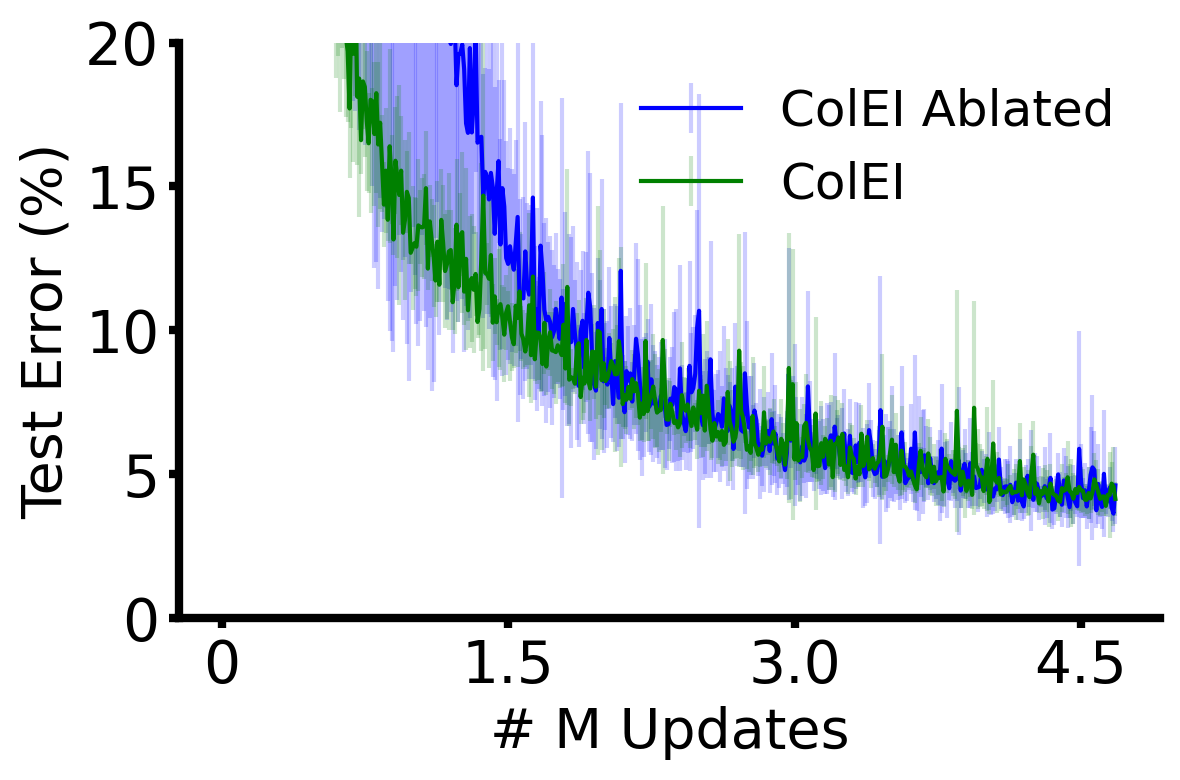

In [4]:
ax = plt.subplot(111)
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams["figure.figsize"] = (6,4)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_linewidth(3)
ax.spines.bottom.set_linewidth(3)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)

# fig, axes = plt.subplots(dpi=100)
# plt.figure(figsize=(8,5))
plt.xlabel('# M Updates', fontsize=20)
plt.ylabel('Test Error (%)', fontsize=20)
transparency = 0.2
# _, _, bars = plt.errorbar(x=rnn["update"].mean(axis=0), y=rnn["test_err"].mean(axis=0), yerr=rnn["test_err"].std(axis=0), color='#50a2d5')
# [bar.set_alpha(transparency) for bar in bars]
# _, _, bars = plt.errorbar(x=dann_rnn["update"].mean(axis=0), y=dann_rnn["test_err"].mean(axis=0), yerr=dann_rnn["test_err"].std(axis=0), color='orange')
# [bar.set_alpha(transparency) for bar in bars]
_, _, bars = plt.errorbar(x=song_rnn["update"].mean(axis=0)[:468], y=song_rnn["test_err"].mean(axis=0)[:468], yerr=song_rnn["test_err"].std(axis=0)[:468], color='b')
[bar.set_alpha(transparency) for bar in bars]
_, _, bars = plt.errorbar(x=song_rnn_no_ablate["update"].mean(axis=0), y=song_rnn_no_ablate["test_err"].mean(axis=0), yerr=song_rnn_no_ablate["test_err"].std(axis=0), color='green')
[bar.set_alpha(transparency) for bar in bars]

plt.ylim([0, 20])
plt.legend(["ColEI Ablated", "ColEI"], fontsize=18, frameon=False)
# plt.legend(["RNN (no gc)",  "DANN RNN (no gc)", "Song RNN (gc=10)"], fontsize=18, frameon=False)
plt.yticks(ticks=[0, 5, 10, 15, 20], size=21)
plt.xticks(labels=["0", "1.5", "3.0", "4.5"], ticks=[0, 15000, 30000, 45000], size=21)
plt.tight_layout()
# plt.savefig('new_plots/SeqMNIST_RNN_Song_Test_Acc.png', format='png', dpi=200)
# plt.savefig('new_plots/SeqMNIST_RNN_Song_Test_Acc.svg', format='svg', dpi=200)

# plt.savefig('new_plots/SeqMNIST_RNN_DANN_Song_Test_Acc.png', format='png', dpi=200)
# plt.savefig('new_plots/SeqMNIST_RNN_DANN_Song_Test_Acc.svg', format='svg', dpi=200)
# print(song_rnn["test_err"].mean(axis=0)[468])
# print(song_rnn_no_ablate["test_err"].mean(axis=0)[-1])

plt.show()